<a href="https://colab.research.google.com/github/rudeboybert/SDS390/blob/master/PS/PS02_albert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 04

Instructions:
1. Name:
1. Create a new ChatGPT chat called "SDS390 PS04" that contains all the prompts you used for this problem set. **After you've completed your assignment**, click the share button and paste the URL in Markdown format [here](https://chat.openai.com/share/7b889388-3220-4005-9cba-ed1eacf28a45) (shared ChatGPT links don't auto-update with subsequent queries).

Overview of this PS: You will be recreating graphs and explicitly computing values from "FPP 7 and 8 - The forecaster's toolbox" in python.

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load and explore data

## US Consumption
Load and wrangle the us_consumption data set, explore the raw values, and plot the time series in an informative fashion.

In [132]:
us_consumption = pd.read_csv("us_consumption.csv", parse_dates = ['Quarter'], index_col = 'Quarter')
# Needed to make exponential smoothing work - set frequency to quarter:
us_consumption = us_consumption.resample('Q').mean()
print(us_consumption.head())
print("\n")
print(us_consumption.tail())

            Consumption    Income  Production   Savings  Unemployment
Quarter                                                              
1970-03-31     0.618566  1.044801   -2.452486  5.299014           0.9
1970-06-30     0.451984  1.225647   -0.551459  7.789894           0.5
1970-09-30     0.872872  1.585154   -0.358652  7.403984           0.5
1970-12-31    -0.271848 -0.239545   -2.185691  1.169898           0.7
1971-03-31     1.901345  1.975925    1.909764  3.535667          -0.1


            Consumption    Income  Production   Savings  Unemployment
Quarter                                                              
2018-06-30     0.983112  0.661825    1.117424 -2.723974           0.0
2018-09-30     0.853181  0.806271    1.256722 -0.085686          -0.3
2018-12-31     0.356512  0.695142    0.948148  5.031337           0.2
2019-03-31     0.282885  1.100753   -0.488206  9.760287          -0.1
2019-06-30     1.113517  0.593399   -0.539949 -4.264616          -0.1


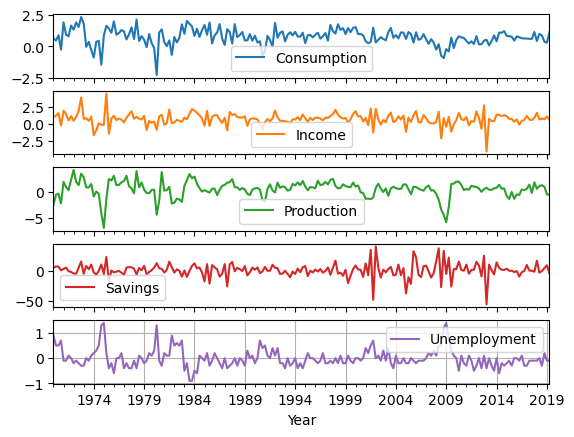

In [137]:
us_consumption.plot(subplots = True)
plt.xlabel('Year')
plt.grid(True)
plt.show()

## Algeria Exports

Load and wrangle the Algeria economy data set, explore the raw values, and plot the time series in an informative fashion.

In [93]:
algeria_economy = pd.read_csv("algeria_economy.csv", parse_dates = ['Year'], index_col = 'Year')[['Exports']]
# Needed to make exponential smoothing work - set frequency to year:
algeria_economy = algeria_economy.resample('Y').mean()
print(algeria_economy.head())
print("\n")
print(algeria_economy.tail())

              Exports
Year                 
1960-12-31  39.043173
1961-12-31  46.244557
1962-12-31  19.793873
1963-12-31  24.684682
1964-12-31  25.084059


              Exports
Year                 
2013-12-31  33.209898
2014-12-31  30.219117
2015-12-31  23.171778
2016-12-31  20.860011
2017-12-31  22.638887


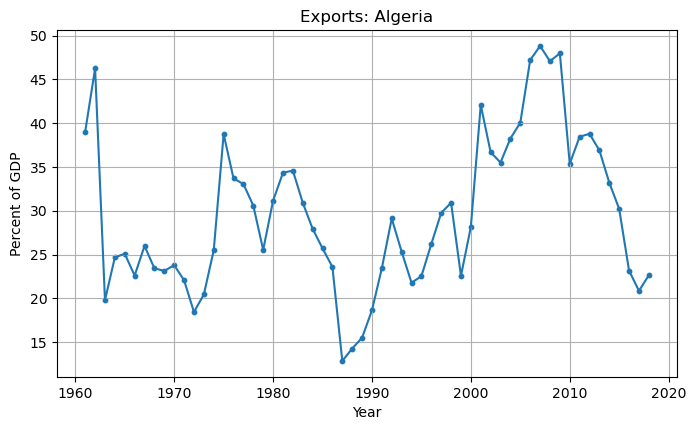

In [97]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(algeria_economy.index, algeria_economy['Exports'])
plt.scatter(algeria_economy.index, algeria_economy['Exports'], marker='o', s=10)
plt.xlabel('Year')
plt.ylabel('Percent of GDP')
plt.title('Exports: Algeria')
plt.grid(True)
plt.show()

## Australia Population

Load and wrangle the Australia economy data set, explore the raw values, and plot the time series in an informative fashion.

In [96]:
aus_population = pd.read_csv("aus_economy.csv", parse_dates = ['Year'], index_col = 'Year')[['Population']]
# Convert to millions:
aus_population.Population = aus_population.Population/pow(10,6)
# Needed to make exponential smoothing work - set frequency to year:
aus_population = aus_population.resample('Y').mean()
print(aus_population.head())
print("\n")
print(aus_population.tail())

            Population
Year                  
1960-12-31  10276477.0
1961-12-31  10483000.0
1962-12-31  10742000.0
1963-12-31  10950000.0
1964-12-31  11167000.0


            Population
Year                  
2013-12-31  23145901.0
2014-12-31  23504138.0
2015-12-31  23850784.0
2016-12-31  24210809.0
2017-12-31  24598933.0


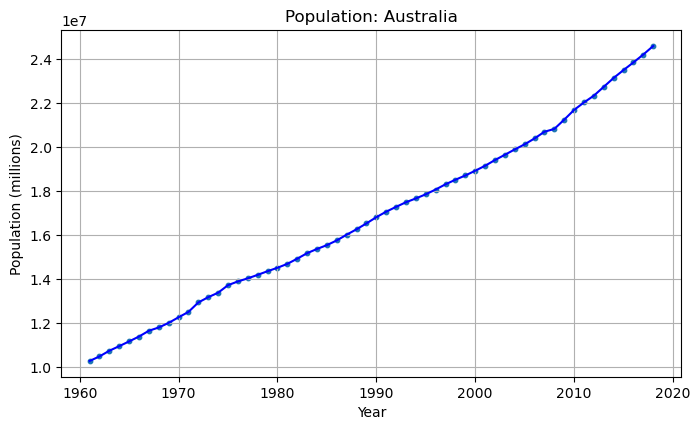

In [98]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(aus_population.index, aus_population['Population'])
plt.scatter(aus_population.index, aus_population['Population'], marker='o', s=10)
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('Population: Australia')
plt.grid(True)
plt.show()

## Australia Tourism

Load and wrangle the Australia Holidays data set, explore the raw values, and plot the time series in an informative fashion.

In [127]:
aus_holidays = pd.read_csv("aus_holidays.csv", parse_dates = ['Quarter'], index_col = 'Quarter')[['Trips']]
# Convert to thousands:
aus_holidays.Trips = aus_holidays.Trips/pow(10,6)
# Needed to make exponential smoothing work - set frequency to quarter:
aus_holidays = aus_holidays.resample('Q').mean()
print(aus_holidays.head())
print("\n")
print(aus_holidays.tail())

                Trips
Quarter              
1998-03-31  11.806038
1998-06-30   9.275662
1998-09-30   8.642489
1998-12-31   9.299524
1999-03-31  11.172027


                Trips
Quarter              
2016-12-31  10.084965
2017-03-31  12.406419
2017-06-30  10.471197
2017-09-30  10.499165
2017-12-31  11.210818


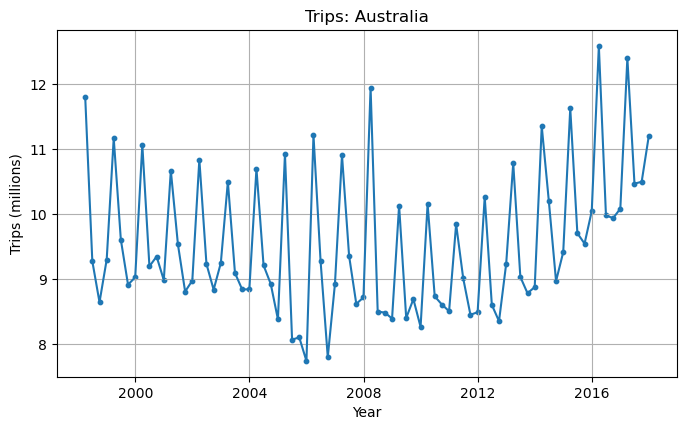

In [129]:
plt.figure(figsize=(16/2, 9/2))
plt.plot(aus_holidays.index, aus_holidays['Trips'])
plt.scatter(aus_holidays.index, aus_holidays['Trips'], marker='o', s=10)
plt.xlabel('Year')
plt.ylabel('Trips (millions)')
plt.title('Trips: Australia')
plt.grid(True)
plt.show()

# Time Series Regression Model
- FPP 7.2 - Simple exponential smoothing: Recreate [Fig 7.6](https://otexts.com/fpp3/least-squares.html#fig:usfitted1)

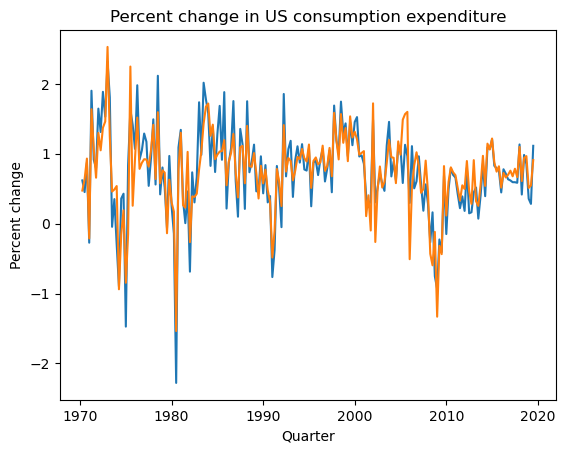

In [153]:
# Fit the Simple Exponential Smoothing model
X = us_consumption[['Income', 'Production', 'Unemployment', 'Savings']] 
y = us_consumption['Consumption'] 
## fit a OLS model with intercept on TV and Radio 
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 


plt.plot(us_consumption.index, us_consumption['Consumption'])
plt.plot(est.fittedvalues)
plt.xlabel('Quarter')
plt.ylabel('Percent change')
plt.title('Percent change in US consumption expenditure')
plt.show()

# Simple Exponential Smoothing
- FPP 8.1 - Simple exponential smoothing: Recreate [Fig 8.2](https://otexts.com/fpp3/ses.html#fig:ses)
- You only need to plot the forecasts into the future. The fitted values for observed time points is optional.
- Do the plot without forecasting/error bands as an MVP. Optional: include the forecasting/error bands.

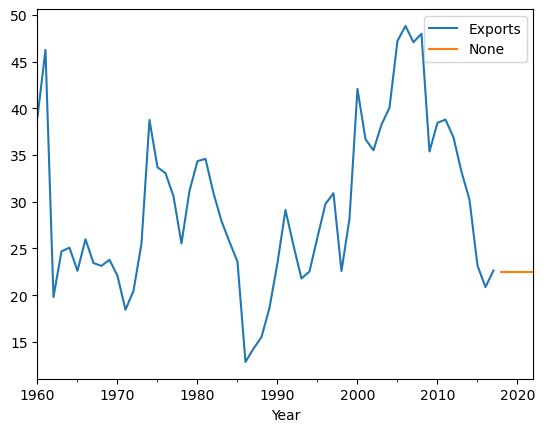

In [144]:
# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(algeria_economy)
fitted_model = model.fit()

# Number of periods to forecast
forecast_periods = 5
forecast = fitted_model.forecast(steps=forecast_periods)

algeria_economy.plot()
forecast.plot()
plt.legend()
plt.show()

# Exponential smoothing with trend
- FPP 8.2 - Exponential smoothing with trend: Recreate [Fig 8.4](https://otexts.com/fpp3/holt.html#fig:dampedtrend)
- You only need to plot the forecasts into the future. The fitted values for observed time points is optional.
- Do the plot without forecasting/error bands as an MVP. Optional: include the forecasting/error bands.
- Optional: include a dampening effect (parameter $\phi$ from Lec 12.1) 

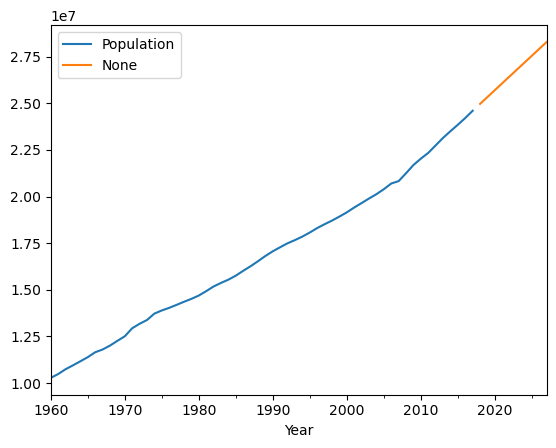

In [125]:
# Fit the Simple Exponential Smoothing model
model = ExponentialSmoothing(aus_economy, trend='add')
fitted_model = model.fit(method='L-BFGS-B')
forecast_periods = 10
forecast = fitted_model.forecast(steps=forecast_periods)
aus_economy.plot()
forecast.plot()
plt.legend()
plt.show()

# Exponential smoothing with seasonality
- FPP 8.3 - Exponential smoothing with seasonality: Recreate [Fig 8.7](https://otexts.com/fpp3/holt-winters.html#fig:7-HW)
- You only need to plot the forecasts into the future. The fitted values for observed time points is optional.
- Include only the additive model
- Do the plot without forecasting/error bands as an MVP. Optional: include the forecasting/error bands.

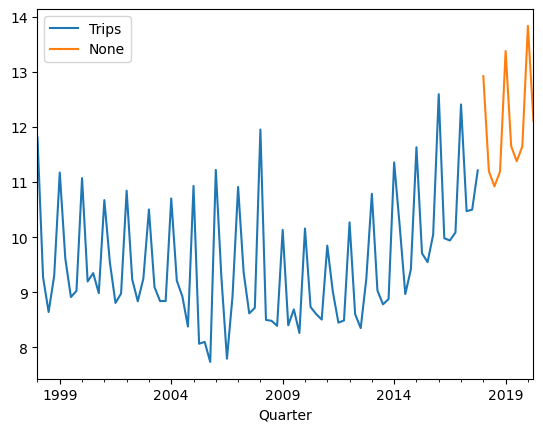

In [124]:
model = ExponentialSmoothing(aus_holidays, trend='add', seasonal='add', seasonal_periods=4)
fitted_model = model.fit()
forecast_periods = 10
forecast = fitted_model.forecast(steps=forecast_periods)
aus_holidays.plot()
forecast.plot()
plt.legend()
plt.show()